## Assignment #2
Analyzing cardiovascular disease data
In this assignment, you will answer questions about a dataset on cardiovascular disease. Problem: predict the presence or absence of cardiovascular disease (CVD) using the patient examination results. Resources: https://www.kaggle.com/kashnitsky/mlcourse?select=mlbootcamp5_train.csv

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

In [3]:
sns.set_context(
    "notebook", 
    font_scale=1.5,       
    rc={ 
        "figure.figsize": (11, 8), 
        "axes.titlesize": 18 
    })

In [8]:
%cd C:\Users\masha\Downloads
data = pd.read_csv('mlbootcamp5_train.csv')
data.head()

C:\Users\masha\Downloads


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
df_uniques = pd.melt(frame=data, value_vars=['gender','cholesterol','gluc', 'smoke', 'alco','active'], id_vars=['cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value', 'cardio'])['value'].count()).sort_index(level=[0, 1]).rename(columns={'value': 'count'}).reset_index()
df_uniques

,variable,value,cardio,count
0,active,0,0,6378
1,active,0,1,7361
2,active,1,0,28643
3,active,1,1,27618
4,alco,0,0,33080
5,alco,0,1,33156
6,alco,1,0,1941
7,alco,1,1,1823
8,cholesterol,1,0,29330
9,cholesterol,1,1,23055


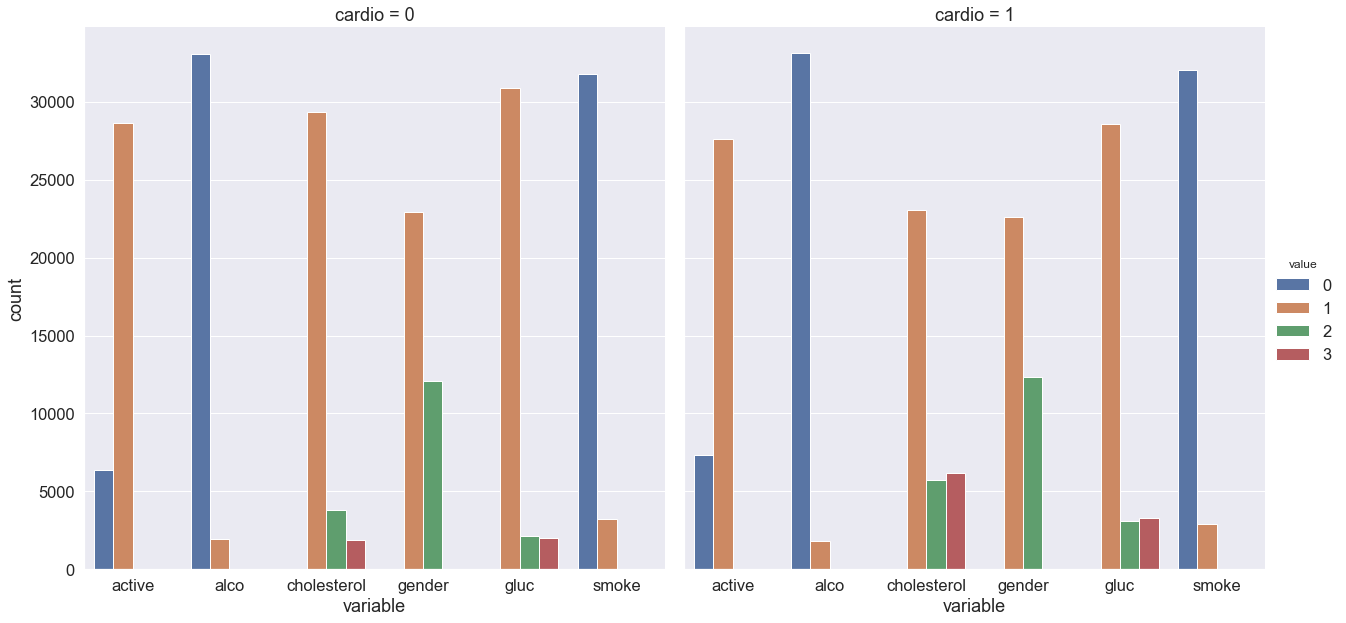

In [11]:
sns.factorplot(x='variable', y='count', hue='value', 
               col='cardio', data=df_uniques, kind='bar', size=9)
# people with the desease have higher cholesterol and gluc;

In [12]:
data.gender.value_counts() 

1    45530
2    24470
Name: gender, dtype: int64

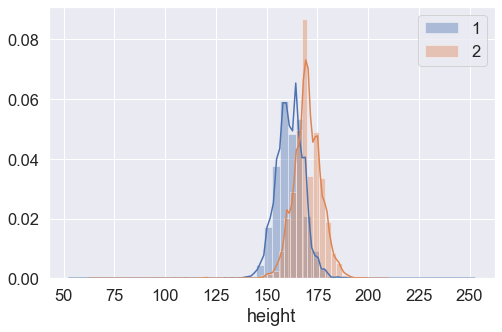

In [103]:
plt.figure(figsize=(8,5))
sns.distplot(data[data.gender==1].height, label='1')
sns.distplot(data[data.gender==2].height, label='2')
plt.legend();
# we can conclude that gender 2 is a man, as its avrg height is bigger

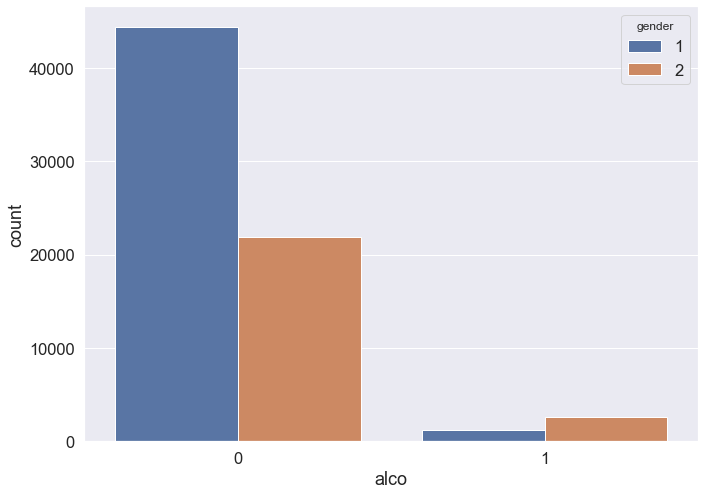

In [23]:
sns.countplot(data=data, x='alco', hue='gender');
# men cosume more alco

In [39]:
# investigate smoking habbits among men and women
df1 = pd.crosstab(data.gender, data.smoke, margins=True)
df1['pcnt'] = df1[1] / df1.All
df1 
#there's a 20% difference in smoking between men and women

smoke,0,1,All,pcnt
gender,,,,
1,44717,813,45530,0.017856
2,19114,5356,24470,0.218880
All,63831,6169,70000,0.088129


In [44]:
(data[data.smoke == 0].age.median() - data[data.smoke == 1].age.median()) / 365 * 12
# age is given in days
# so the difference between median values of age for smokers and non-smokers is 20 months

19.627397260273973

(resource: https://www.escardio.org/Education/Practice-Tools/CVD-prevention-toolbox/SCORE-Risk-Charts)
For people in the gender-age group whose systolic pressure is less than 120 the risk of a CVD is estimated to be **5 times lower** than for those with the pressure in the interval [160,180)

In [45]:
# task 1.5
data['age_years'] = (data.age / 365.25).round().astype('int')

In [46]:
smoking_old_men = data[(data.gender == 2)&(data.age_years >= 60)&(data.age_years < 65)&(data.smoke == 1)]

In [47]:
smoking_old_men[(smoking_old_men.cholesterol == 1)&(smoking_old_men.ap_hi < 120)].cardio.mean()
# the proportion of people with CVD is 26% for this categories

0.2631578947368421

In [48]:
smoking_old_men[(smoking_old_men.cholesterol == 3)&(smoking_old_men.ap_hi >= 160)&(smoking_old_men.ap_hi < 180)].cardio.mean()
# in our case the difference is approximately 3-fold, not 5-fold

0.8636363636363636

In [49]:
# task 1.6
data['BMI'] = data.weight / (data.height/100) ** 2

In [50]:
# Normal BMI values are said to be from 18.5 to 25, so in our case median BMI is out of this range
data.BMI.median()

26.374068120774975

In [53]:
data.groupby('gender').BMI.median()
# The BMI for women is on average higher than for men

gender
1    26.709402
2    25.910684
Name: BMI, dtype: float64

In [54]:
data.groupby('cardio').BMI.median()
# healthy people have lower BMI

cardio
0    25.476660
1    27.471384
Name: BMI, dtype: float64

In [55]:
data.groupby(['gender', 'alco', 'cardio']).BMI.median()
# so for healthy, non-drinking men, BMI is closer to the norm than for healthy, non-drinking women

gender  alco  cardio
1       0     0         25.654372
              1         27.885187
        1     0         27.885187
              1         30.110991
2       0     0         25.102391
              1         26.674874
        1     0         25.351541
              1         27.530797
Name: BMI, dtype: float64

## Data cleaning

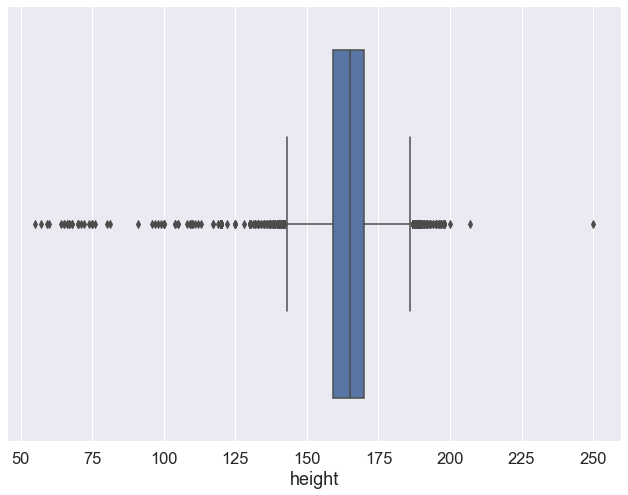

In [56]:
sns.boxplot(data.height)
# there are outliers for weight and height

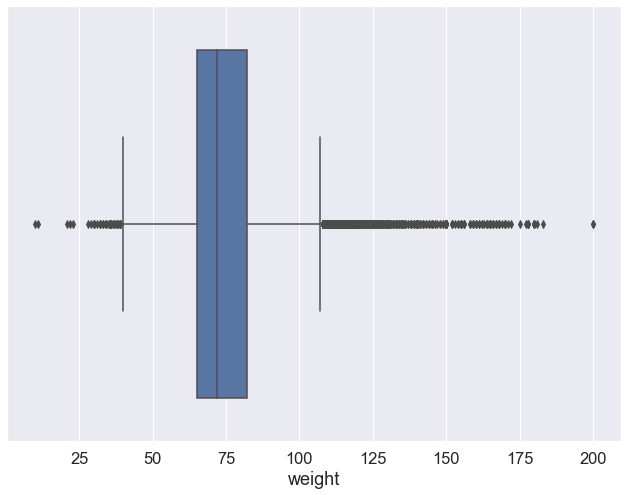

In [57]:
sns.boxplot(data.weight)

In [61]:
data.height.quantile(0.975), data.height.quantile(0.025), data.weight.quantile(0.975), data.weight.quantile(0.025)

(180.0, 150.0, 108.0, 51.0)

In [62]:
filtered_df = data[(data.ap_lo <= data.ap_hi) & 
                 (data.height >= data.height.quantile(0.025)) &
                 (data.height <= data.height.quantile(0.975)) &
                 (data.weight >= data.weight.quantile(0.025)) & 
                 (data.weight <= data.weight.quantile(0.975))]
filtered_df.shape[0] / data.shape[0] # have reduced 10% of the originall data

0.9037

## Visual data analysis

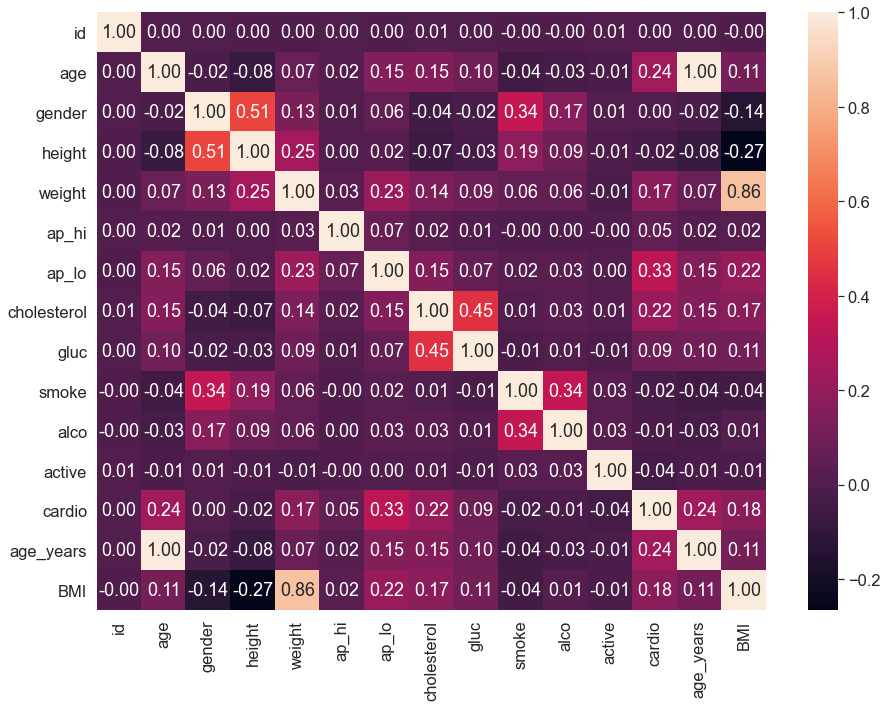

In [68]:
fig, ax = plt.subplots(figsize=(15, 11))
sns.heatmap(filtered_df.corr(), annot=True, ax=ax, fmt='.2f')

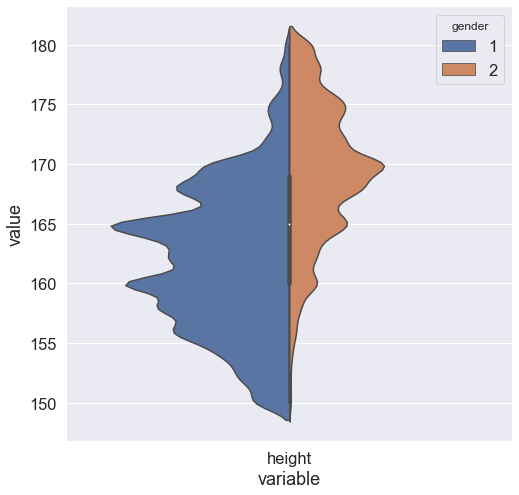

In [85]:
df1 = pd.melt(filtered_df, value_vars=['height'], id_vars=['gender'])
plt.figure(figsize=(8, 8))
ax = sns.violinplot(data=df1, x='variable', y='value', hue='gender', split=True, scale='count', scale_hue=False)

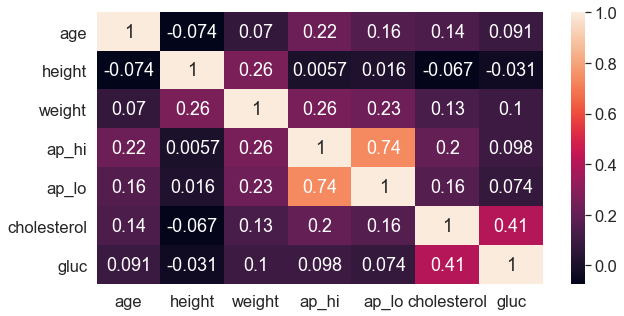

In [92]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(filtered_df[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 
                         'cholesterol', 'gluc']].corr(method='spearman'), annot=True)
# Ap_hi, Ap_lo have the strongest spearman correlation, in the case of person corr, these vars have almost 0 corr
# this can be explained, that these vars have not linear relationships but monotonic

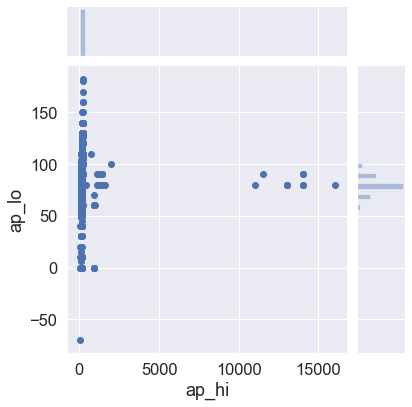

In [97]:
sns.jointplot(x='ap_hi', y='ap_lo', 
              data=filtered_df, kind='scatter');

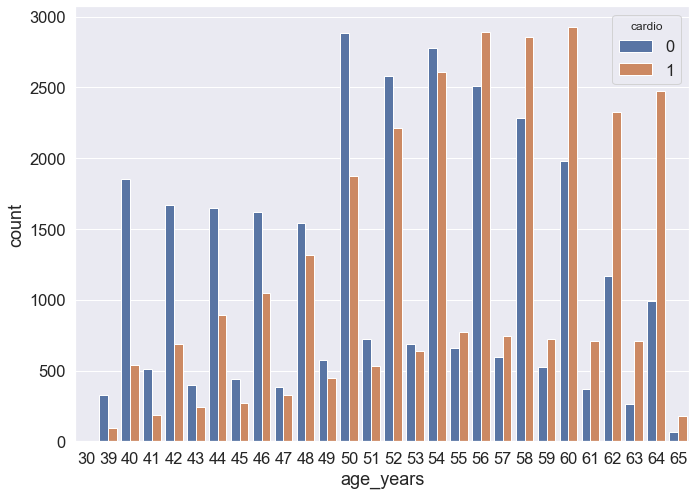

In [99]:
sns.countplot(x='age_years', hue='cardio', data=filtered_df)
# at the age of 55 the number of people with CVD outnumber the number of people without CVD